In [55]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.utils import shuffle

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing

from sklearn.metrics import plot_confusion_matrix

In [56]:
# df = pd.read_csv('./data/data_processed.csv', index_col=0)
df = pd.read_csv('./data/data_processed_normalized.csv', index_col=0)
# df = pd.read_csv('./data/raw_data_cleaned.csv')

In [57]:
df.columns

Index(['Food Name', 'Water (g)', 'Energy (kal)', 'Protein (g)', 'lipid (g)',
       'Carbohydrate (g)', 'Fiber (g)', 'Ash (g)', 'Ca (mg)', 'Fe (mg)',
       'Mg (mg)', 'P (mg)', 'K (mg)', 'Na (mg)', 'Zn (mg)', 'Se (µg)',
       'Cu (mg)', 'Mn (mg)', 'Vc (mg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'B6 (mg)', 'Folate,DFE (µg)', 'B12 (µg)', 'Va,RAE (µg)',
       'Ve (mg)', 'saturated (g)', 'monounsaturated (g)',
       'polyunsaturated (g)', 'trans (g)', 'Cholesterol (mg)', 'Caffeine (mg)',
       'phenolics (mg)', 'pH', 'Plain Occurences', 'Cool Occurences',
       'Warm Occurences', 'Cold Occurences', 'Heavy Cold Occurences',
       'Heavy Warm Occurences', 'Hot Occurences', 'Heavy Hot Occurences',
       '% Plain', '% Cool', '% Warm', '% Cold', '% Heavy Cold', '% Heavy Warm',
       '% Hot', '% Heavy Hot', 'hot_cold_scale', 'Plain', 'Cold', 'Hot',
       'Mode'],
      dtype='object')

In [58]:
df = df.drop(columns=['% Plain', '% Cool', '% Warm', '% Cold', '% Heavy Cold', '% Heavy Warm',
       '% Hot', '% Heavy Hot', 'Plain', 'Cold', 'Hot', 'Plain Occurences', 'Cool Occurences',
       'Warm Occurences', 'Cold Occurences', 'Heavy Cold Occurences',
       'Heavy Warm Occurences', 'Hot Occurences', 'Heavy Hot Occurences',])

In [59]:
df.columns

Index(['Food Name', 'Water (g)', 'Energy (kal)', 'Protein (g)', 'lipid (g)',
       'Carbohydrate (g)', 'Fiber (g)', 'Ash (g)', 'Ca (mg)', 'Fe (mg)',
       'Mg (mg)', 'P (mg)', 'K (mg)', 'Na (mg)', 'Zn (mg)', 'Se (µg)',
       'Cu (mg)', 'Mn (mg)', 'Vc (mg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'B6 (mg)', 'Folate,DFE (µg)', 'B12 (µg)', 'Va,RAE (µg)',
       'Ve (mg)', 'saturated (g)', 'monounsaturated (g)',
       'polyunsaturated (g)', 'trans (g)', 'Cholesterol (mg)', 'Caffeine (mg)',
       'phenolics (mg)', 'pH', 'hot_cold_scale', 'Mode'],
      dtype='object')

In [60]:
df.head()

,Food Name,Water (g),Energy (kal),Protein (g),lipid (g),Carbohydrate (g),Fiber (g),Ash (g),Ca (mg),Fe (mg),...,saturated (g),monounsaturated (g),polyunsaturated (g),trans (g),Cholesterol (mg),Caffeine (mg),phenolics (mg),pH,hot_cold_scale,Mode
0,Alfalfa,0.903084,0.036199,0.092251,0.0070,0.029565,0.035714,0.012024,0.093645,0.028747,...,0.000734,0.000885,0.009808,0.0,0.0,0.0,0.056587,0.501295,0.5,Plain
1,dolichos sinensis,0.902082,0.020362,0.040590,0.0030,0.074421,0.080827,0.007014,0.051839,0.008214,...,0.003193,0.003161,0.011990,0.0,0.0,0.0,0.005868,0.545557,0.5,Plain
2,hazelnuts,0.053164,0.710407,0.275830,0.6075,0.170252,0.182331,0.041082,0.095318,0.048255,...,0.047507,0.721474,0.189928,0.0,0.0,0.0,0.041018,0.636909,0.5,Plain
3,"Beans, kidney",0.117641,0.376697,0.435055,0.0083,0.611785,0.468045,0.009018,0.119565,0.084189,...,0.001277,0.001011,0.010959,0.0,0.0,0.0,0.004102,0.511364,0.5,Plain
4,"Peanuts,",0.065078,0.641403,0.476015,0.4924,0.164441,0.159774,0.032064,0.076923,0.047023,...,0.066822,0.386023,0.373094,0.0,0.0,0.0,0.053398,0.715909,0.5,Plain


### Logistic Regression

In [61]:
def label_mode(row):
    if row['Mode'] == 'Plain':
        return 0
    elif row['Mode'] == 'Cold':
        return 1
    elif row['Mode'] == 'Hot':
        return 2
    else:
        return 3
    
df['mode_code'] = df.apply (lambda row: label_mode(row), axis=1)

df = df.drop(columns='Mode')

In [62]:
df.iloc[0, 1:-1]

Water (g)              0.903084
Energy (kal)           0.036199
Protein (g)            0.092251
lipid (g)                 0.007
Carbohydrate (g)       0.029565
Fiber (g)              0.035714
Ash (g)                0.012024
Ca (mg)                0.093645
Fe (mg)                0.028747
Mg (mg)                0.014085
P (mg)                 0.013119
K (mg)                 0.002693
Na (mg)                0.000676
Zn (mg)                0.006361
Se (µg)                0.000747
Cu (mg)                0.003337
Mn (mg)                0.010545
Vc (mg)                0.420619
Thiamin (mg)           0.000001
Riboflavin (mg)        0.000825
Niacin (mg)            0.029416
B6 (mg)                0.037713
Folate,DFE (µg)         0.08143
B12 (µg)                    0.0
Va,RAE (µg)            0.386402
Ve (mg)                  0.0564
saturated (g)          0.000734
monounsaturated (g)    0.000885
polyunsaturated (g)    0.009808
trans (g)                   0.0
Cholesterol (mg)            0.0
Caffeine

In [67]:
def logistic_regression(df):
    """
    Apply sample logistic regression model to dataframe

    df : (dataframe)
    x : (compounds column as int)
    y : (classification column as int)
    """
    # values of each column
    x = df.iloc[:, 1:-1] # df.iloc[2:, 1:39]??
    y = df["mode_code"].astype('int')
    # split data into training and test set
    # 75 training, 25 testing
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

    # standardize and scale data
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)

    # modeling + analysis
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
    model.fit(xtrain, ytrain.ravel())
    y_pred = model.predict(xtest)

    # confusion matrix of test size
    conf_m = confusion_matrix(ytest, y_pred)
    print("Confusion Matrix : ", conf_m)
    
    plot_confusion_matrix(model, xtest, ytest)

    # accuracy score of test size
    print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix :  [[15  3  0]
 [ 2 21  0]
 [ 0  0  8]]
Accuracy :  0.8979591836734694


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


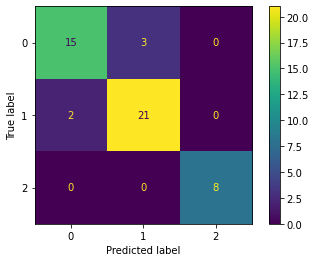

In [68]:
logistic_regression(df)

### KNN

In [55]:
def knn(df, y_col_name):
    x = df.iloc[:, 1:-1] # df.iloc[2:, 1:39]??
    y = df[y_col_name][:]
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [56]:
knn(df, "hot_cold_scale")

Accuracy :  0.16326530612244897


/Users/aaronxie/.local/share/virtualenvs/analysis-gniU7RWb/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


more processing for following

### Random Forest

In [85]:
df = pd.read_csv('./data/data_processed_normalized.csv', index_col=0)
df.columns

Index(['Unnamed: 0.1', 'Water (g)', 'Energy (kal)', 'Protein (g)', 'lipid (g)',
       'Carbohydrate (g)', 'Fiber (g)', 'Ash (g)', 'Ca (mg)', 'Fe (mg)',
       'Mg (mg)', 'P (mg)', 'K (mg)', 'Na (mg)', 'Zn (mg)', 'Se (µg)',
       'Cu (mg)', 'Mn (mg)', 'Vc (mg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'B6 (mg)', 'Folate,DFE (µg)', 'B12 (µg)', 'Va,RAE (µg)',
       'Ve (mg)', 'saturated (g)', 'monounsaturated (g)',
       'polyunsaturated (g)', 'trans (g)', 'Cholesterol (mg)', 'Caffeine (mg)',
       'phenolics (mg)', 'pH', 'Plain Occurences', 'Cool Occurences',
       'Warm Occurences', 'Cold Occurences', 'Heavy Cold Occurences',
       'Heavy Warm Occurences', 'Hot Occurences', 'Heavy Hot Occurences',
       '% Plain', '% Cool', '% Warm', '% Cold', '% Heavy Cold', '% Heavy Warm',
       '% Hot', '% Heavy Hot', 'hot_cold_scale', 'Plain', 'Cold', 'Hot',
       'Mode'],
      dtype='object')

In [15]:
df['mode_code']

KeyError: 'mode_code'

In [102]:
def random_forest(df):
    X = df.drop(["Plain Occurences", "Cool Occurences", "Warm Occurences", "Cold Occurences", "Heavy Cold Occurences", "Heavy Warm Occurences","Hot Occurences", "Heavy Hot Occurences", "mode_code", "Mode", '% Plain', '% Cool', '% Warm', '% Cold', '% Heavy Cold', '% Heavy Warm','% Hot', '% Heavy Hot', 'Plain', 'Cold', 'Hot', 'hot_cold_scale'], axis = 1)
    Y = df["mode_code"].astype('int')

    factor = pd.factorize(df['Mode'])
    df.Mode = factor[0]
    definitions = factor[1]
    print(definitions)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    reversefactor = dict(zip(range(3),definitions))
    y_test = np.vectorize(reversefactor.get)(y_test)
    y_pred = np.vectorize(reversefactor.get)(y_pred)
    print(pd.crosstab(y_test, y_pred, rownames=['Actual Temp'], colnames=['Predicted Temp']))
    print(accuracy_score(y_test, y_pred))

In [103]:
random_forest(df)

Int64Index([0, 1, 2], dtype='int64')
Predicted Temp   0   1  2
Actual Temp              
0               14   4  3
1                9  15  1
2                6   4  5
0.5573770491803278


### SVM

In [107]:
def svm(df):
    X = df.drop(["Plain Occurences", "Cool Occurences", "Warm Occurences", "Cold Occurences", "Heavy Cold Occurences", "Heavy Warm Occurences","Hot Occurences", "Heavy Hot Occurences", "mode_code", "Mode", '% Plain', '% Cool', '% Warm', '% Cold', '% Heavy Cold', '% Heavy Warm','% Hot', '% Heavy Hot', 'Plain', 'Cold', 'Hot', 'hot_cold_scale'], axis = 1)
    y = df["mode_code"].astype('int')
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)
    rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
    poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
    poly_pred = poly.predict(X_test)
    rbf_pred = rbf.predict(X_test)
    poly_accuracy = accuracy_score(y_test, poly_pred)
    poly_f1 = f1_score(y_test, poly_pred, average='weighted')
    print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
    print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
    rbf_accuracy = accuracy_score(y_test, rbf_pred)
    rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
    print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
    print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

In [108]:
svm(df)

Accuracy (Polynomial Kernel):  55.10
F1 (Polynomial Kernel):  50.04
Accuracy (RBF Kernel):  26.53
F1 (RBF Kernel):  11.13
